# Numeric Differentiation

Suppose we have a function $ f $ and we want to approximate its derivative.




## Forward Difference

The simplest method to approximate the derivative is by taking the Taylor series expansion of $ f $ around $ x+h $:

$$
f(x+h) = f(x) + h f'(x) + \frac{h^2}{2!} f''(x) + \dots + \frac{h^n}{n!} f^{(n)}(x)
$$

Now, if we only take terms up to the second derivative and solve for \( f'(x) \), we get:

$$
f'(x) = \frac{f(x+h) - f(x)}{h} - h f''(x) + \dots
$$

We can approximate $ f'(x) $ as:

$$
f'(x) \approx \frac{f(x+h) - f(x)}{h} - O(h)
$$

The error in this approximation is of order $ O(h) $.


In [15]:
def forward_diff(f, x, h):
    return (f(x+h)-f(x))/h

## Central Difference

To reduce the error of approximation, we can use the central differences. Again, we start with:

$$
f(x+h) = f(x) + h f'(x) + \frac{h^2}{2!} f''(x) + \dots + \frac{h^n}{n!} f^{(n)}(x)
$$

We use a property of Taylor expansion for an exact expression with an intermediate point $ c_1 $ such that $ x \leq c_1 \leq x+h $:

$$
f(x+h) = f(x) + h f'(x) + \frac{h^2}{2!} f''(x) + \frac{h^3}{3!} f'''(c_1)
$$

Similarly, we take the Taylor expansion around $ x-h $:

$$
f(x-h) = f(x) - h f'(x) + \frac{h^2}{2!} f''(x) - \frac{h^3}{3!} f'''(c_2)
$$

where $ x \leq c_2 \leq x+h $. Now, summing these two expansions, we get:

$$
f(x+h) - f(x-h) = 2 h f'(x) + \frac{h^3}{3} f'''(c)
$$

where $ x-h \leq c \leq x+h $. Solving for $ f'(x) $, we have:

$$
f'(x) \approx \frac{f(x+h) - f(x-h)}{2h} - \frac{h^2}{6} f'''(c)
$$

The error in this approximation is of order $ O(h^2) $.

In [17]:
def central_diff(f, x, h):
    return (f(x+h)-f(x-h))/(2*h)

## Second Derivative
Suppose we have a function $ f $ and we want to approximate its second derivative, $ f''(x) $.
Again we start with:
$$
   f(x+h) = f(x) + h f'(x) + \frac{h^2}{2!} f''(x) + \frac{h^3}{3!} f'''(x) + \frac{h^4}{4!} f^{(\mathrm{IV})}(c_1)
$$
$$
   f(x-h) = f(x) - h f'(x) + \frac{h^2}{2!} f''(x) - \frac{h^3}{3!} f'''(x) +  \frac{h^4}{4!} f^{(\mathrm{IV})}(c_2)
$$

Now, adding these two expansions together, we get:

$$
f(x+h) + f(x-h) = 2f(x) + h^2 f''(x) + \frac{h^4}{4!} f^{(\mathrm{IV})}(c)
$$

Solving for $ f''(x) $, we have:
$$
f''(x) \approx \frac{f(x+h) - 2f(x) + f(x-h)}{h^2} - \frac{2h^3}{4!} f^{(\mathrm{IV})}(c)
$$
The error in this approximation is again of order $ O(h^2) $.

In [19]:
def second_central_diff(f, x, h):
    return (f(x+h)-2*f(x)+f(x-h))/(h*h)

## Effect of $ h $ on Precision

### Demonstration
We take $ f(x) = \sqrt{x} $ as an example. Let $ x = 2 $, and we will use the following $ h $ values: 1, 0.1, 0.01, 0.001, 0.0001. Our numerical precision is to the 5th decimal place.


Analytical value of f'(x) 0.35355
Analytical value of f''(x) -0.08839

     h   f'(2)     f''(2)    e(f')      e(f'')
1.0000 0.36603   -0.09637 0.012477    0.007982
0.1000 0.35370   -0.08800 0.000147    0.000388
0.0100 0.35350   -0.10000 0.000053    0.011612
0.0010 0.35500   10.00000 0.001447   10.088388
0.0001 0.35000 1000.00000 0.003553 1000.088388


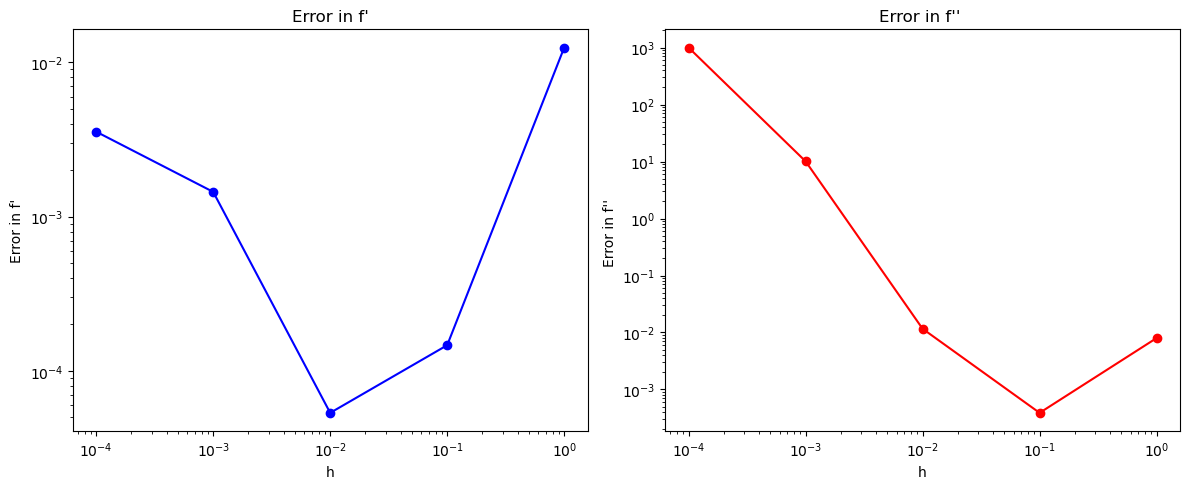

In [63]:
x=2

h=[1,0.1,0.01,0.001,0.0001]

def central_diff(f, x, h):
    return (round(f(x+h),5)-round(f(x-h),5))/(2*h)

def second_central_diff(f, x, h):
    return (round(f(x+h),5)-2*round(f(x),5)+round(f(x-h),5))/(h*h)

df=[round(central_diff(lambda x:x**0.5 , x , hi),5) for hi in h]

ddf=[round(second_central_diff(lambda x:x**0.5 , x , hi),5) for hi in h]

import pandas as pd
import matplotlib.pyplot as plt

print("Analytical value of f'(x)", round(0.5*x**(-0.5),5))
print("Analytical value of f''(x)", round(-0.25*x**(-1.5),5))
print()


error_df = [ abs(dfi -0.5*x**(-0.5))  for dfi in df]
error_ddf = [ abs(ddfi - -0.25*x**(-1.5)) for ddfi in ddf]

df_table = pd.DataFrame({
    "h": h,
    "f'(2)": df,
    "f''(2)": ddf,
    "e(f')": error_df,
    "e(f'')": error_ddf
})

print(df_table.to_string(index=False))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(h, error_df, marker='o', linestyle='-', color='b')
plt.xscale('log')  
plt.yscale('log')  
plt.xlabel("h")
plt.ylabel("Error in f'")
plt.title("Error in f'")


plt.subplot(1, 2, 2)
plt.plot(h, error_ddf, marker='o', linestyle='-', color='r')
plt.xscale('log')  
plt.yscale('log')    
plt.xlabel("h")
plt.ylabel("Error in f'' ")
plt.title("Error in f'' ")


plt.tight_layout()
plt.show()

We can see the error has a minimum at an intermidiate value of h. That is the optimal value for h. 
We can rewrite $f'(x)$ with precision error, e:
f'(x)=f(x+h)+- f(x-h)+-e /2h - h^2 f'''(c)/6

Some quick arithmetics and we can estimate the total error, E as:
E(h)=2e/2h - h^2M/6 , where M=f'''(c) 
The error can never be zero, but we can find its minimal value.
Taking the derivative of E:
E'(h)=-e/h^2 -2hM/6=0
-3e/M=h^3
h_optimal=(abs(3e/M))^1/3, we took absolute value for maximal error.

Going back to our demonstration. We approximate c~2, so M=3/8*2^(-5/2) = 0.06629. Our precision error, e, for 5 decimals spaces is at most 5*10^-6.
h_optimal=0.061 then. 

We observe that the error has a minimum at an intermediate value of $ h $; this is the optimal $ h $ value.

We can rewrite $ f'(x) $ with a precision error, $ e $:

$$
f'(x) = \frac{f(x+h) - f(x-h)}{2h} \pm e - \frac{h^2 f'''(c)}{6}
$$

where $ c $ is some point in the interval between $ x - h $ and $ x + h $. 

### Estimating Total Error, $ E(h) $

With some quick arithmetic, we can estimate the total error $ E(h) $ as:

$$
E(h) = \frac{2e}{2h} - \frac{h^2 M}{6}
$$

where $ M = f'''(c) $ is a bound on the third derivative near $ x $. 

The error $ E(h) $ can never be zero, but we can find its minimal value by taking the derivative of $ E(h) $ with respect to $ h $:

$$
E'(h) = -\frac{e}{h^2} - \frac{h M}{3} = 0
$$

Solving for $ h $:

$$
h^3 = - \frac{3e}{M}
$$

So,

$$
h_{\text{optimal}} = \left( \frac{3e}{M} \right)^{1/3}
$$

Taking the absolute value, we have:

$$
h_{\text{optimal}} = \left( \left| \frac{3e}{M} \right| \right)^{1/3}
$$

(Note: We take absolute value, because with precision we never know whether we have positive or negative error.)

##### Applying to Our Demonstration

For $ f(x) = \sqrt{x} $, we approximate $ c \approx 2 $, so 

$$
M = \frac{3}{8} \cdot 2^{-5/2} = 0.06629
$$

Our precision error, $ e $, for 5 decimal places, is at most $ 5 \times 10^{-6} $.

Thus,

$$
h_{\text{optimal}} \approx 0.061
$$

### Second derivative error
The same methodology can be applied to the second derivative:
f''(x) = f(x+h)+-e - 2*f(x)+-2e + f(x-h) +-e /h^2 - h^2f(IV)(c) /12

Total error is:
E(h)=4e/h^2 -h^2M/12, where M=f(IV)(c)

minimizing with resopect to h:
E'(h)=-8e/h^3 - hM/6 =0
h^4=-48e/M
h_opt=(abs(-48e/M))^1/4

### Second derivative error
We can apply a similar methodology to approximate the error in the second derivative.

The expression for the second derivative with error $e $ is:

$$
f''(x) = \frac{f(x+h) \pm e - 2f(x) \pm 2e + f(x-h) \pm e}{h^2} - \frac{h^2 f^{(IV)}(c)}{12}
$$

where $ f^{(IV)}(c) $ is the fourth derivative of $ f $ at some point $ c $ near $ x $.

The total error $ E(h) $ is then:

$$
E(h) = \frac{4e}{h^2} - \frac{h^2 M}{12}
$$

where $ M = f^{(IV)}(c) $ is a bound on the fourth derivative.

To find the optimal $ h $, we take the derivative of $ E(h) $ with respect to $ h $ and set it to zero:

$$
E'(h) = -\frac{8e}{h^3} - \frac{h M}{6} = 0
$$

Solving for $ h $:

$$
h^4 =- \frac{48e}{M}
$$

So,

$$
h_{\text{optimal}} = \left( \left| \frac{48e}{M} \right| \right)^{1/4}
$$

## Derivative at Boundary Points

When working with numerical data, whether it is interpolated or discrete, we often deal with a fixed domain. In such cases, using the central difference method at boundary points becomes impossible since we don't have data points on both sides of the boundary. What can we do to keep the error to order $h^2$ ?


### Forward difference
At the boundary we have a point x, we also have points x+h and x+2h. We can take Taylor expansion of f x+h and x+2h:
f(x+h)f(x)+h(f'(x)+h^2f''(x)/2 + ...
f(x+3h)f(x)+3h(f'(x)+(2h)^2f''(x)/2 + ...

combining these two equations to eliminate f''(x):
f(x+2h)-4f(x+h)=-3f8x)-2hf'(x)

and expressing f'(x)
f'(x)=-f(x+2h)+4f(x+h)-3f(x) /2h

### Forward difference
At the boundary, we have a point $ x $, and we also have points at $ x + h$ and $ x + 2h$. We can use Taylor expansions to approximate the function at these points:

1. For $ f(x + h) $, the Taylor expansion around $ x $ is:
   $$ 
   f(x + h) = f(x) + h f'(x) + \frac{h^2}{2} f''(x) + \dots
   $$

2. For $ f(x + 2h) $, the Taylor expansion around $ x $ is:
   $$ 
   f(x + 2h) = f(x) + 2h f'(x) + \frac{(2h)^2}{2} f''(x) + \dots
   $$

To eliminate $ f''(x) $, we subtract the first expansion from the second:

$$
f(x + 2h) - 4f(x + h) + 3f(x) = -2h f'(x)
$$


Now, we can solve for the derivative $ f'(x) $:

$$
f'(x) = \frac{-f(x + 2h) + 4f(x + h) - 3f(x)}{2h}
$$

In [91]:
def forward_boundary(f,x,h):
    return (-f(x+2*h) +4*f(x+h)-3*f(x))/(2*h)

### Backward Difference

At the boundary, we have a point $ x $, and we also have points at $ x - h $ and $ x - 2h $. We can use Taylor expansions to approximate the function at these points:

1. For $ f(x - h) $, the Taylor expansion around $ x $ is:
   $$ 
   f(x - h) = f(x) - h f'(x) + \frac{h^2}{2} f''(x) + \dots
   $$

2. For $ f(x - 2h) $, the Taylor expansion around $ x $ is:
   $$ 
   f(x - 2h) = f(x) - 2h f'(x) + \frac{(2h)^2}{2} f''(x) + \dots
   $$

To eliminate $ f''(x) $, we subtract the first expansion from the second:

$$
f(x - 2h) - 4f(x - h) + 3f(x) = 2h f'(x)
$$

Now, we can solve for the derivative $f'(x) $:

$$
f'(x) = \frac{f(x - 2h) - 4f(x - h) + 3f(x)}{2h}
$$


In [93]:
def backward_boundary(f,x,h):
    return (f(x-2*h) -4*f(x-h)+3*f(x))/(2*h)

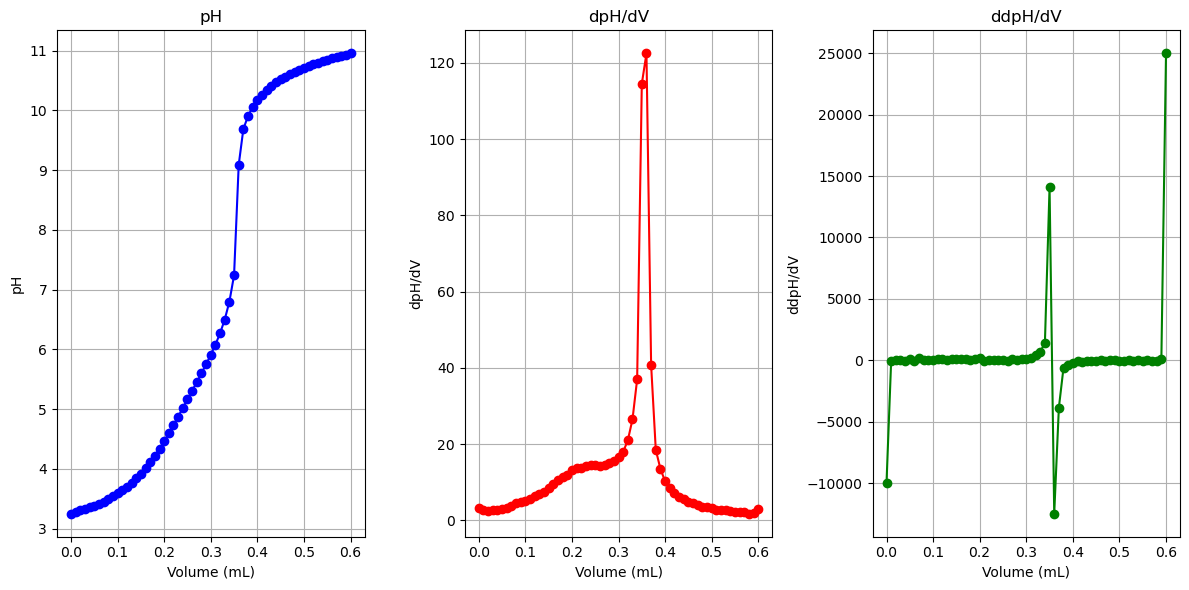

In [111]:
#Titration example
#In this example we have equaly spaced data so that we can use central differences. 
#Realistically interpoaltion would be needed to get a function, that can be differentiated.

import matplotlib.pyplot as plt

V = [0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6]
pH = [3.25, 3.28, 3.305, 3.33, 3.36, 3.385, 3.42, 3.45, 3.495, 3.54, 3.59, 3.64, 3.7, 3.77, 3.84, 3.92, 4.01, 4.11, 4.22, 4.335, 4.46, 4.6, 4.735, 4.875, 5.02, 5.165, 5.31, 5.45, 5.6, 5.75, 5.91, 6.08, 6.27, 6.5, 6.8, 7.24, 9.09, 9.69, 9.905, 10.06, 10.175, 10.265, 10.345, 10.41, 10.47, 10.52, 10.565, 10.61, 10.645, 10.68, 10.715, 10.745, 10.77, 10.8, 10.825, 10.85, 10.87, 10.895, 10.915, 10.93, 10.955]

h=V[1]-V[0]

def numeric_first(y,h):
    dy=[(-y[2]+4*y[1]-3*y[0])/(2*h)]
    for i in range(1,len(y)-1):
        dy.append((y[i+1]-y[i-1])/(2*h))
    dy.append((y[-3]-4*y[-2]+3*y[-1])/(2*h))
    return dy
def numeric_second(y,h):
    dy=[(-y[3]+4*y[2]-5*y[1]+2*y[0])/(h*h*h)]
    for i in range(1,len(y)-1):
        dy.append((y[i+1]-2*y[i]+y[i-1])/(h*h))
    dy.append((-y[-4]+4*y[-3]-5*y[-2]+2*y[-1])/(h*h*h))
    return dy

dpH=numeric_first(pH,h)
ddpH=numeric_second(pH,h)

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.plot(V, pH, marker='o', color='b', label='pH')
plt.title("pH")
plt.xlabel("Volume (mL)")
plt.ylabel("pH")
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(V, dpH, marker='o', color='r', label="dpH/dV")
plt.title("dpH/dV")
plt.xlabel("Volume (mL)")
plt.ylabel("dpH/dV")
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(V, ddpH, marker='o', color='g', label="ddpH/dV")
plt.title("ddpH/dV")
plt.xlabel("Volume (mL)")
plt.ylabel("ddpH/dV")
plt.grid(True)

plt.tight_layout();

In [132]:
#Let us find the titration point
def bisection(x :list,y:list):
    zeros=[] #from graph it is clear there are many zeroes
    for i in range(len(y)-1):
        if (y[i]*y[i+1]<0):
            zeros.append((x[i]+x[i+1])/2) #I ll just take the mid point here
    return zeros
    
print("All intersection: ", bisection(V,ddpH), "\n")
#From graph we see we are looking for a big drop
def bisection(x :list,y:list):
    zeros=[] #from graph it is clear there are many zeroes
    for i in range(len(y)-1):
        if ((y[i]*y[i+1]<0) and (abs(y[i+1])+abs(y[i])>5000)):
            zeros.append((x[i]+x[i+1])/2) #I ll just take the mid point here
    return zeros
    
print("Equivalent point: ", bisection(V,ddpH))

All intersection:  [0.025, 0.035, 0.045, 0.055, 0.065, 0.20500000000000002, 0.215, 0.245, 0.265, 0.355, 0.515, 0.525, 0.535, 0.545, 0.555, 0.565, 0.585] 

Equivalent point:  [0.355]
